<a href="https://colab.research.google.com/github/metahwi/MachineLearning/blob/main/Neighbor_Classifier_Ensemble_Methods_Kernel_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Create an imbalanced target variable
y = np.where(y > np.percentile(y, 50), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Nearest Neighbor Classifier

The k-NN algorithm is relatively simple and is based on the assumption that similar things exist in close proximity.

The steps for the k-NN algorithm are as follows:

- Choose the number of $k$ neighbors
- For each example in the test data, do the following:
  - Calculate the distance between the test data example and each example in the training data. You can use the Euclidean distance for this exercise.
  - Sort the distances in increasing order
  - Select the $k$ nearest training examples that are closest to the test example: corresponding to the first $k$ distances from this sorted list
  - Get the labels of the selected $k$ training examples
  - Return the mode of the $k$ labels
  - The prediction is the most common class among the $k$ nearest neighbors

We will compare the test accuracy of KNN with $k=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]$. Then plot the accuracy curve with the number of neighbors $k$ on the x-axis and the accuracy on the test set on the y-axis.


In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        # Ensure X is a NumPy array and only contains values
        self.X_train = np.array(X, dtype=float)
        self.y_train = y

    def predict(self, X):
        # Ensure X is a NumPy array and only contains values
        X = np.array(X, dtype=float)
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        if isinstance(x, (list, pd.Series)):
            x = np.array(x, dtype=float)

        if np.isnan(x).any() or np.isinf(x).any():
            raise ValueError("Input contains NaN or Inf values.")

        # Compute the distances
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

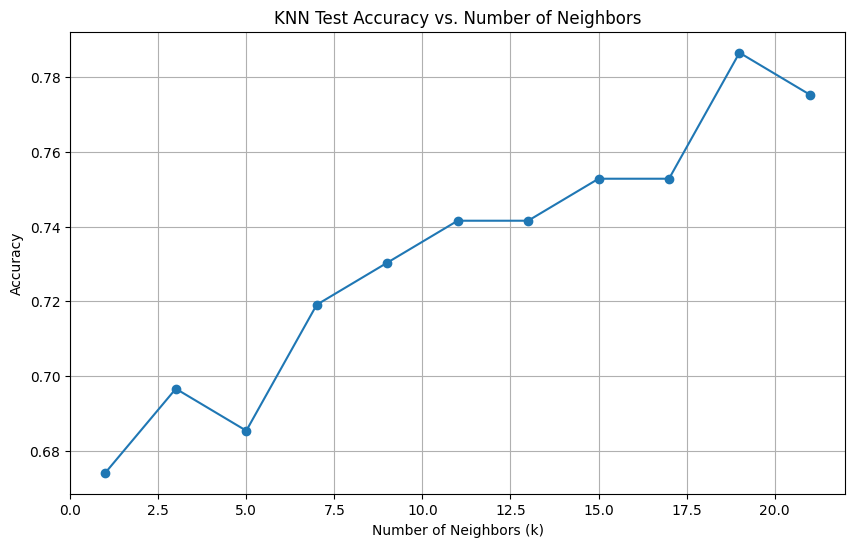

In [ ]:
# Initialize lists to store accuracies
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracies = []

# Loop over various values of k
for k in k_values:
    # Create and fit the KNN model
    knn = KNN(k=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Compute and store accuracy
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Test Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

##How does changing this parameter affect the performance of the KNN?

>A lower k can lead to overfitting, where the model becomes overly sensitive to noise in the training data. For instance, $k=1$ makes the model choose the nearest training example's label, which might not accurately represent the overall data distribution. On the other hand, a higher $k$ may cause underfitting, making the model potentially diluting the influence of rarer classes in imbalanced datasets. The decision boundary of the model also becomes smoother as $k$ increases, indicating a shift from a complex to a simpler model. This smoothness is beneficial for reducing the impact of noise and outliers but might overlook critical nuances in the data. The bias-variance tradeoff is a crucial aspect to consider here: lower $k$ values have higher variance but lower bias, whereas higher $k$ values have the opposite effect. Additionally, computational costs increase with larger $k$ values, as more distances are calculated and evaluated. Ultimately, the optimal $k$ is often dataset-specific and is best determined through cross-validation or other model selection methods, aiming for a balance that minimizes both overfitting and underfitting.

Decision Trees

We will train a Decision tree classifier and evaluate its performance on the test set.
- Train multiple Decision Tree classifiers with different values of max_depth ranging from 1 to 15 on the diabetes dataset.
- For each classifier, compute and plot the accuracy on both the training set and the test set.
- Create a plot that has max_depth on the x-axis and test accuracy on the y-axis. Analyze the plots to determine the max_depth at which the decision tree begins to overfit.

> The max_depth at which overfitting begins is at 7, where I observe the test accuracy peaking and then starting to decline. The max_depth value at 7 is where the test accuracy graph peaks and begins to diverge from the training accuracy. This is the point *where* the model starts to learn the noise and idiosyncrasies in the training data, rather than generalizing from the underlying patterns.

Test Set Accuracy: 0.6741573033707865


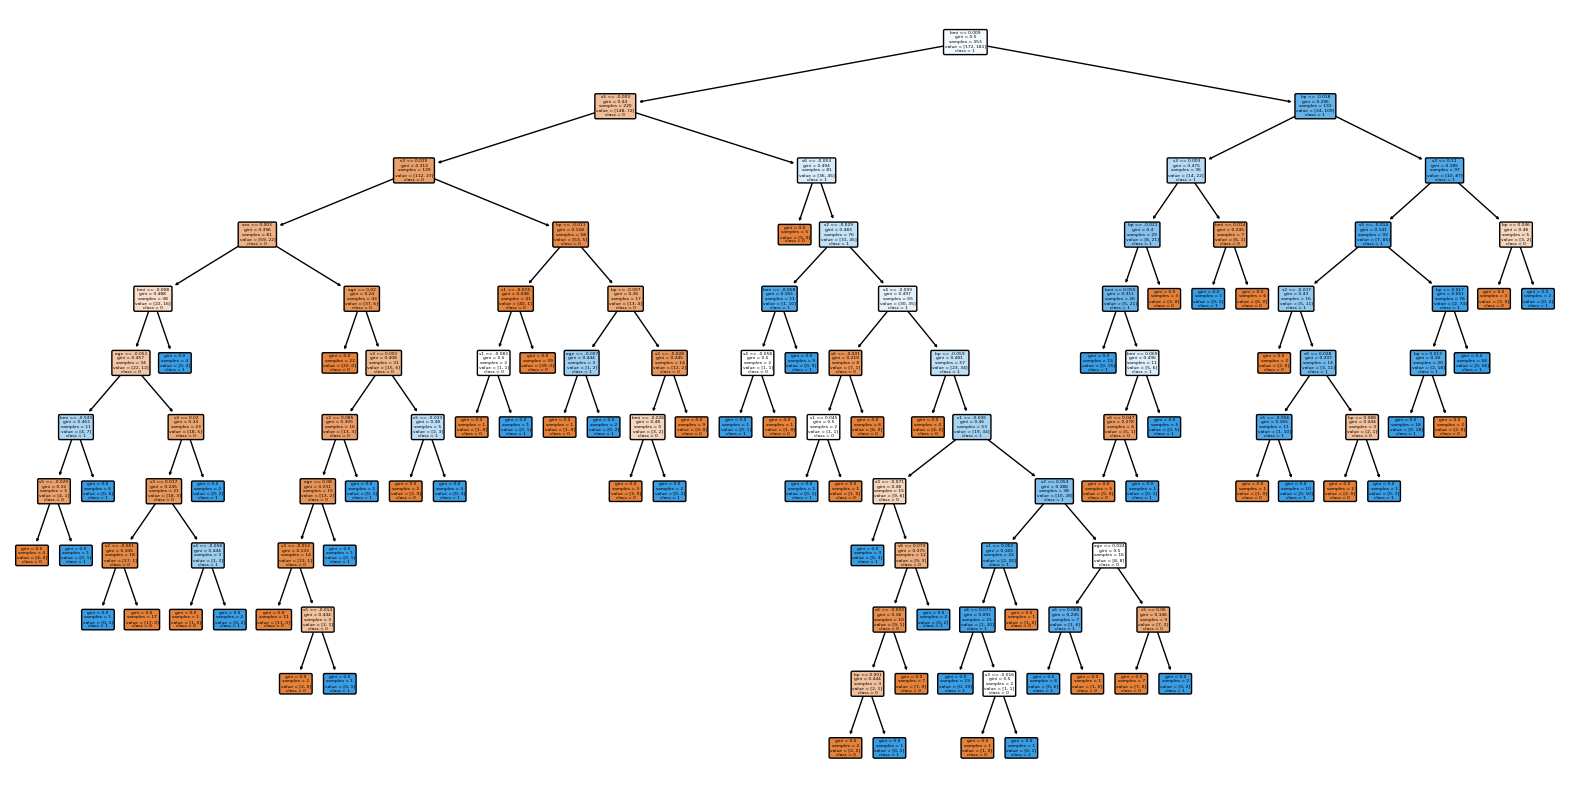

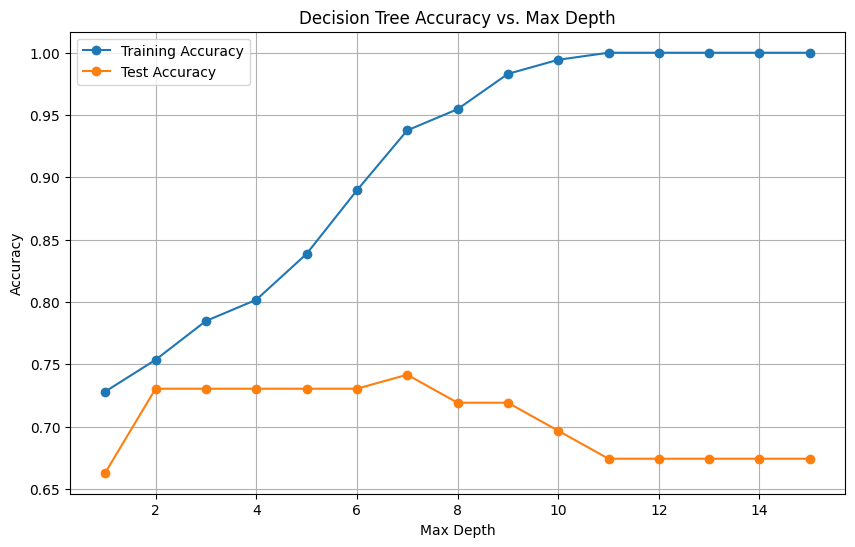

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Task 2.1: Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate its performance on the test set
y_pred_test = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Task 2.2: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()

# Task 2.3: Train Decision Trees with varying max_depth and plot accuracies
train_accuracies = []
test_accuracies = []
max_depth_values = range(1, 16)

for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    # Compute accuracy on the training set
    y_pred_train = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)

    # Compute accuracy on the test set
    y_pred_test = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()


> In the decision tree visualization, the root node represents the initial and most significant decision point. This node is determined by the feature that best separates the data according to the target variable. The process within this root node involves selecting a specific feature and a threshold value that effectively splits the dataset into two subsets. The format inside this node typically reads as "[Feature] <= [Value]". This indicates that if the value of this chosen feature for an individual data point is less than or equal to the specified threshold, the data point will follow the left branch of the tree. Conversely, if the value exceeds the threshold, it will follow the right branch. This binary decision-making at the root is crucial as it sets the stage for all subsequent splits and decisions in the tree. The feature and threshold chosen at the root node are the result of an optimization process that aims to maximize the separation of the data based on the target variable, thereby initiating the tree's strategy for classification or regression.




> To trace the path from the root to any two leaf nodes in a decision tree, begin at the root node, where the initial decision is based on a specific feature and its threshold value. For instance, the root might split the data based on the criterion "Feature A <= Value X". From there, follow the path to the left if a data point's value for Feature A is less than or equal to Value X, or to the right if it's greater. As we move down the tree, each subsequent node represents a further decision point, typically involving different features and their respective threshold values. This process of branching left or right continues until a leaf node is reached. The leaf node represents a final decision or classification, determined by the series of feature-based splits starting from the root and following through the tree. Each leaf node thus embodies a unique combination of decisions made along its path, encapsulating a specific set of criteria that data points must satisfy to end up at that particular leaf.


## Bagging and Boosting

We will implement bagging from scratch by completing the CustomBaggingClassifier Class.

In [ ]:
import numpy as np
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class CustomBaggingClassifier:
    def __init__(self, base_estimator=DecisionTreeClassifier(), n_estimators=10, bootstrap_size=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.bootstrap_size = bootstrap_size
        self.models = []

    def _bootstrap(self, X, y):
      # Generate a bootstrap sample
      indices = np.random.choice(len(X), size=self.bootstrap_size, replace=True)
      return X.iloc[indices], y[indices]

    def fit(self, X, y):
        # Train each base model on a different bootstrap sample
        self.models = []
        for _ in range(self.n_estimators):
            model = clone(self.base_estimator)
            X_sample, y_sample = self._bootstrap(X, y)
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        # Aggregate predictions from all base models
        predictions = np.array([model.predict(X) for model in self.models])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

    def score(self, X, y):
        # Return the accuracy of the classifier
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

In [ ]:
# Separate the features and target values
X = data.drop('target', axis=1)
y = data['target'].values

# Create an imbalanced target variable
y = np.where(y > np.percentile(y, 50), 1, 0)


# Train a single decision tree
single_tree = DecisionTreeClassifier()
single_tree.fit(X_train, y_train)
single_tree_accuracy = single_tree.score(X_test, y_test)

# Train the CustomBaggingClassifier
bagging_classifier = CustomBaggingClassifier(n_estimators=10, bootstrap_size=len(X_train))
bagging_classifier.fit(X_train, y_train)
bagging_accuracy = bagging_classifier.score(X_test, y_test)

print(f"Single Decision Tree Accuracy: {single_tree_accuracy}")
print(f"Bagging Classifier Accuracy: {bagging_accuracy}")

Single Decision Tree Accuracy: 0.7078651685393258
Bagging Classifier Accuracy: 0.7415730337078652


Lets implement AdaBoost and Gradient Boosting with the base estimator as a decision tree with depth = 1.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Base estimator: Decision tree with depth = 1
base_estimator = DecisionTreeClassifier(max_depth=1)

# AdaBoost
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)
ada_boost_accuracy = ada_boost.score(X_test, y_test)

# Gradient Boosting
grad_boost = GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=42)
grad_boost.fit(X_train, y_train)
grad_boost_accuracy = grad_boost.score(X_test, y_test)

print(f"AdaBoost Accuracy: {ada_boost_accuracy}")
print(f"Gradient Boosting Accuracy: {grad_boost_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.6741573033707865
Gradient Boosting Accuracy: 0.7303370786516854


In [ ]:
from sklearn.ensemble import BaggingClassifier

# Range of 'n_estimators' to explore
estimator_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Function to find the optimal number of estimators
def find_optimal_estimators(model, estimator_range):
    best_accuracy = 0
    optimal_estimators = 0
    for n in estimator_range:
        temp_model = clone(model)
        temp_model.set_params(n_estimators=n)
        temp_model.fit(X_train, y_train)
        accuracy = temp_model.score(X_test, y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            optimal_estimators = n
    return optimal_estimators, best_accuracy

# Find optimal estimators
optimal_estimators_bagging, best_acc_bagging = find_optimal_estimators(BaggingClassifier(base_estimator=base_estimator), estimator_range)
optimal_estimators_adaboost, best_acc_adaboost = find_optimal_estimators(AdaBoostClassifier(base_estimator=base_estimator), estimator_range)
optimal_estimators_gradboost, best_acc_gradboost = find_optimal_estimators(GradientBoostingClassifier(max_depth=1), estimator_range)

print("Optimal Estimators and Accuracies:")
print(f"Bagging: Estimators - {optimal_estimators_bagging}, Accuracy - {best_acc_bagging}")
print(f"AdaBoost: Estimators - {optimal_estimators_adaboost}, Accuracy - {best_acc_adaboost}")
print(f"Gradient Boosting: Estimators - {optimal_estimators_gradboost}, Accuracy - {best_acc_gradboost}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Optimal Estimators and Accuracies:
Bagging: Estimators - 30, Accuracy - 0.7078651685393258
AdaBoost: Estimators - 20, Accuracy - 0.7528089887640449
Gradient Boosting: Estimators - 40, Accuracy - 0.7415730337078652


> The grid search is specifically focused on one particular hyperparameter: the number of estimators (or "models") in each ensemble method. It is more accurately described as a parameter swee. It involves varying the number of estimators within a predefined range and evaluating the performance of the ensemble model at each point. This approach helps in identifying the optimal number of models that lead to the best performance, measured in terms of accuracy.

>For Bagging, AdaBoost, and Gradient Boosting, this means training each type of ensemble with different quantities of base estimators (or "bags") and observing how the accuracy on a validation set (like your test set) changes with each variation. The optimal number of estimators is the count that yields the highest accuracy, balancing the trade-off between underfitting and overfitting.

### Random Forest Classifier

Lets construct the random forest classifier with a set of hyper-parameters of choice. We will evaluate its performance on the test set.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Constructing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Example hyperparameters
rf_classifier.fit(X_train, y_train)

# Evaluating its performance on the test set
rf_test_accuracy = rf_classifier.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

Random Forest Test Accuracy: 0.7191011235955056


In [ ]:
tree_counts = [10, 50, 100, 200]
for count in tree_counts:
    rf = RandomForestClassifier(n_estimators=count, random_state=42)
    rf.fit(X_train, y_train)
    print(f"Trees: {count}, Training Accuracy: {rf.score(X_train, y_train)}, Test Accuracy: {rf.score(X_test, y_test)}")

Trees: 10, Training Accuracy: 0.9830028328611898, Test Accuracy: 0.7191011235955056
Trees: 50, Training Accuracy: 1.0, Test Accuracy: 0.7415730337078652
Trees: 100, Training Accuracy: 1.0, Test Accuracy: 0.7191011235955056
Trees: 200, Training Accuracy: 1.0, Test Accuracy: 0.7415730337078652


Cross-validation to find an optimal set of hyperparameters for the Random Forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a set of hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    # Add more parameters if needed
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Optimal hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validated Accuracy: {grid_search.best_score_}")

Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Best Cross-validated Accuracy: 0.7251106639839036


Comparing the accuracy of random forest with the decision tree classifier, which one obtains better performance and why?
> Random Forest outperformed the decision tree classifier. Random Forest is an ensemble method that builds multiple decision trees and merges them together for a more accurate and stable prediction. In contrast, a single decision tree is more prone to overfitting and might not capture the entire complexity of the data.


What effect does changing this parameter have on training and test accuracy?
> While a higher number of trees can improve the Random Forest's performance, especially in terms of training accuracy and stability, the impact on test accuracy is not always linear.

### Histogram and Kernel Density Estimation

For the BMI feature, we will plot a histogram with the density estimation with 30 equal width bins.


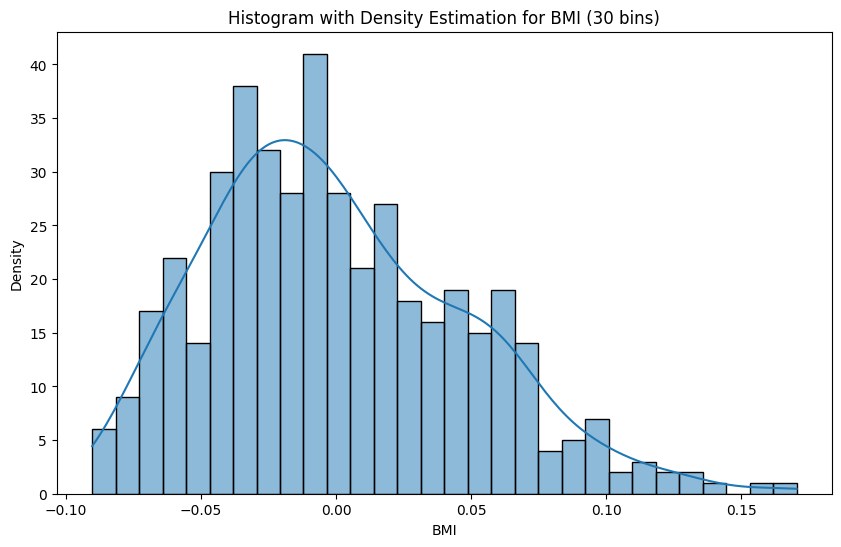

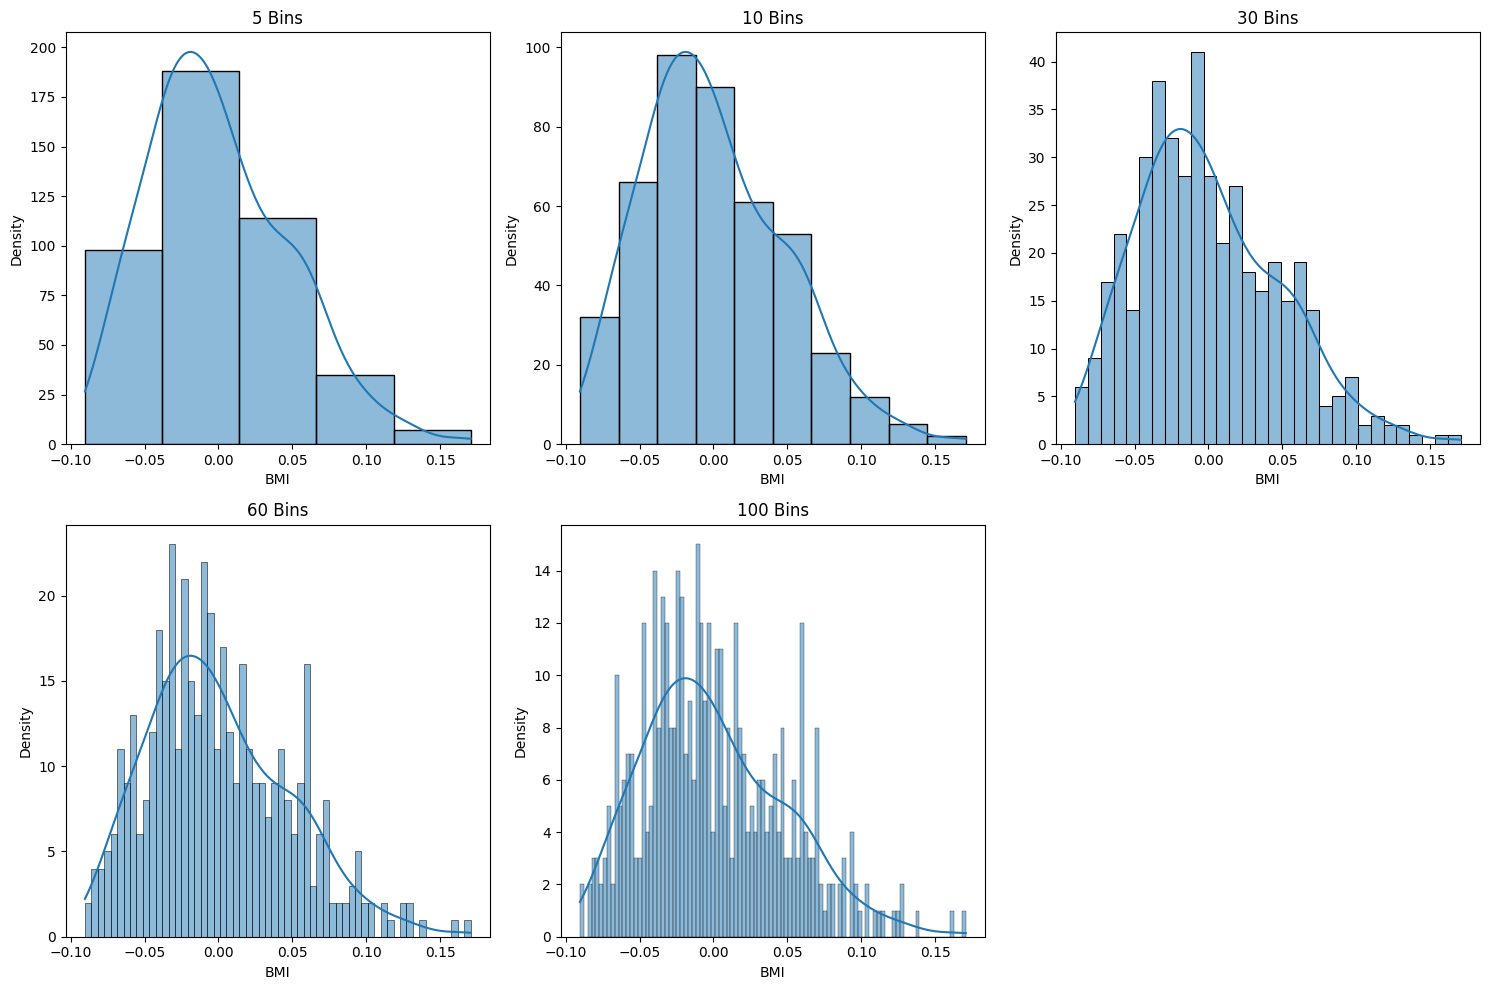

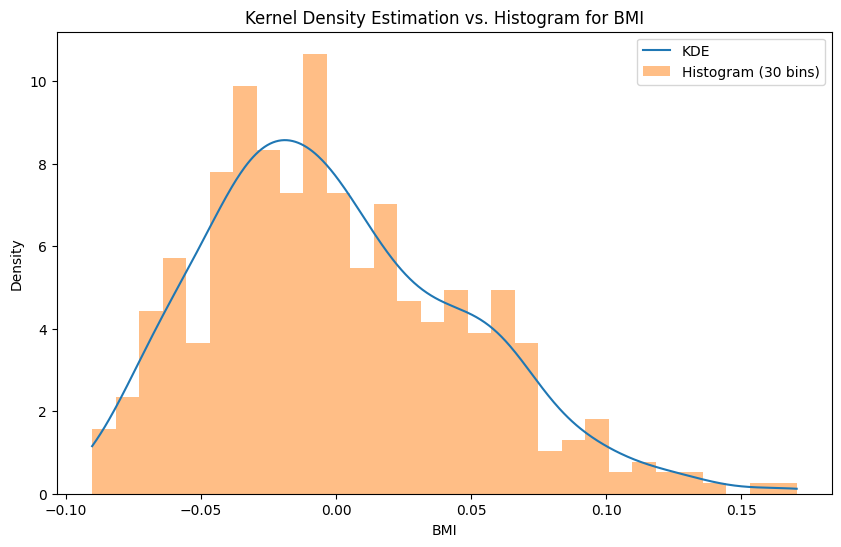

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Task 5.1: Histogram with density estimation for the BMI feature
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title('Histogram with Density Estimation for BMI (30 bins)')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

# Task 5.2: Histograms with different number of bins
bin_counts = [5, 10, 30, 60, 100]
plt.figure(figsize=(15, 10))

for i, bins in enumerate(bin_counts, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data['bmi'], bins=bins, kde=True)
    plt.title(f'{bins} Bins')
    plt.xlabel('BMI')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Task 5.3: Kernel Density Estimation with Gaussian kernels
bmi_kde = gaussian_kde(data['bmi'])
bmi_values = np.linspace(data['bmi'].min(), data['bmi'].max(), 500)

plt.figure(figsize=(10, 6))
plt.plot(bmi_values, bmi_kde(bmi_values), label="KDE")
plt.hist(data['bmi'], bins=30, density=True, alpha=0.5, label="Histogram (30 bins)")
plt.title('Kernel Density Estimation vs. Histogram for BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()



What does the height of a bin in the histogram represent?
> The height of a bin in a histogram represents the frequency density of the data within the range of that bin. Specifically, it shows the number of data points in that bin's range as a proportion of the total number of data points, divided by the bin width. This helps in understanding the distribution of data values.

How do outliers affect the histogram shape?
> A few extreme values can stretch the x-axis, making the histogram sparser and potentially obscuring the underlying distribution. They can also lead to bins with very high counts if several outliers fall within the same range, giving a skewed representation of the data distribution.


How might a doctor use KDE to understand the distribution of a particular health metric (like blood glucose levels) across a population?
> KDE provides a smooth, continuous curve that represents the probability density of a given health metric, such as blood glucose levels, BMI, blood pressure, etc. This continuous nature of KDE makes it easier for doctors to understand the distribution of these metrics across a population. Unlike histograms, KDE is not bound by the rigidity of bins, allowing for a more nuanced view of the data. With KDE, doctors can easily spot the most common values (peaks in the density curve) and areas with low occurrences (troughs). This can help in identifying normal ranges for certain health metrics and recognizing values that are unusually high or low, which might indicate health risks or anomalies. KDE can also be used for comparative analysis, such as comparing the distribution of a health metric between different demographic groups, time periods, or before and after a particular treatment. This can reveal insights into how certain factors or interventions are impacting population health.